<a href="https://colab.research.google.com/github/marcelozanchetta/EDS104/blob/main/Lab9_Atividade_Dados_Exploratorios_Regras_Associacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório 9**

Essa atividade busca explorar a mineração de conjuntos de itens que são frequentemente encontrados em um domínio. O uso dessa propriedade permite:
* Com a mineração dos conjuntos frequentes, eles nos permitem extrair regras de associação entre os os conjuntos de itens, onde fazemos alguma declaração sobre a probabilidade de dois conjuntos de itens coocorram ou ocorram condicionalmente.
* Exemplo de aplicação é em um supermercado ou e-commerce por meio da análise dos carrinhos de compras dos clientes (os chamados “cestos de mercado”).
* Essa atividade explora algoritmo de análise de itens frequentes com a Linguagem Python.


# **Avaliação de Padrões Frequentes e Regras de Associação**

# Bibliotecas

Para exploração das regras de associação, usaremos o pacote *mlxtend* (https://rasbt.github.io/mlxtend/). O pacote já vem instalado no ambiente Google Colab.

Caso não funcione, pode ser necessário instalar com os comandos:

`!pip install mlxtend`

In [ ]:
!pip install mlxtend

Segue as bibliotecas após a instação do pacote:

In [35]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Leitura do Dataset

Um conjunto de dados que contém todas as transações ocorridas entre 01/12/2010 e 09/12/2011 para um e-commerce registrado no Reino Unido. A empresa vende principalmente produtos para diferentes as ocasiões. Muitos clientes da empresa são atacadistas. O dataset está disponível no link: https://archive.ics.uci.edu/ml/datasets/online+retail

Referência: Chen, Daqing, Sai Laing Sain, and Kun Guo. "Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining." Journal of Database Marketing & Customer Strategy Management 19, no. 3 (2012): 197-208.

Em que os seguintes atributos são definidos:

* InvoiceNo: Número da fatura. Se esse código começar com a letra "c", isso indica um cancelamento.
* StockCode: Código do produto (item).
* Description (Descrição): Nome do produto (item).
* Quantidade: As quantidades de cada produto (item) por transação.
* UnitPrice: Preço unitário. Preço do produto por unidade em libras esterlinas (£).
* CustomerID: Número do cliente.
* Country (País): Nome do país.

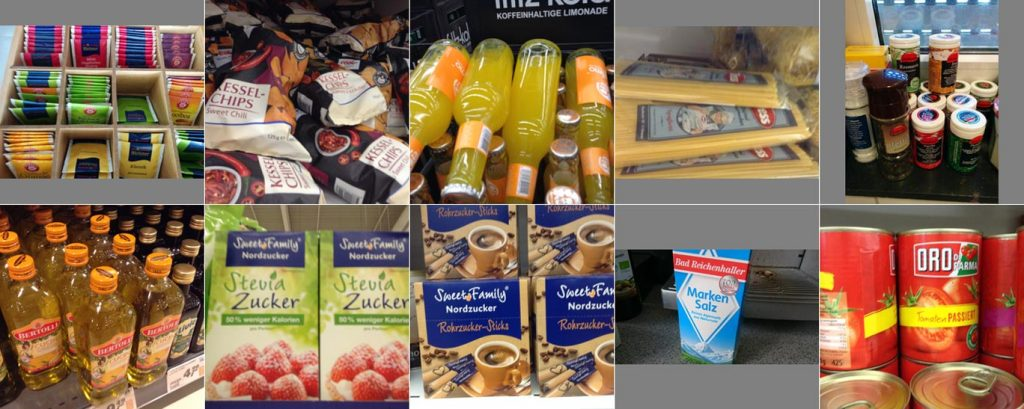
Fonte: https://www.linksprite.com/12-free-retail-image-datasets-for-computer-vision/

Esse dataset está disponível no github de nossa disciplina (https://github.com/marcelozanchetta/EDS104):




In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Dados_Exploratorios_dataset-cvs/datasets/dataset_ecommerce.xlsx')
df

In [ ]:
df.head(10)

In [ ]:
print(df.info())

In [ ]:
df.Country.value_counts().head(5)

In [ ]:
df.Description.value_counts().head(15)

Traz as ocorrências de valores ausentes para uma determinado atributo investigado:

In [ ]:
import missingno as msno
msno.bar(df);

Removendo registros com valores ausentes

In [25]:
df.dropna(inplace=True)

Mostra os resultados após a eliminação dos registros com valores ausentes:

In [ ]:
import missingno as msno
msno.bar(df);

# Transformando em Transações

Em que cada linha é uma transação, cada coluna é um item e as células com valor 1.0 indicam quando o item foi adquirido naquela transação.

In [ ]:
transacoes = df.groupby(['InvoiceNo', 'Description'])['Description'].count().unstack().fillna(0)
transacoes

Garantindo que as células só possuam valores 1 ou 0

In [28]:
def binarizar(v):
    if v <= 0:
        return 0
    if v >= 1:
        return 1

In [ ]:
transacoes = transacoes.applymap(binarizar)
transacoes

Função usada para serializar um objeto DataFrame chamado transacoes para a função do Apriori.

In [31]:
transacoes.to_pickle('transacoes.pkl')

In [32]:
transacoes = pd.read_pickle('transacoes.pkl')

# Extraindo os itemsets frequentes com o algoritmo APRIORI

Caso tenha pouco memória, aumente o suporte mínimo. Informações sobre os parâmetros da função acesse: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [ ]:
%%time
df_if = apriori(transacoes, min_support = 0.02, use_colnames = True)

In [ ]:
df_if

# Gerando as regras de associação a partir dos itemsets frequentes

Usando confiança mínima de 0.5 (50%). Informações sobre a função acesse: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [ ]:
df_ar = association_rules(df_if, metric = "lift", min_threshold = 0.5)
df_ar

As regras com mais alto suporte aparecem primeiro:

In [ ]:
df_ar[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False).head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.scatter(df_ar['support'], df_ar['confidence'], c=df_ar['confidence'], alpha=0.9, cmap='YlOrRd');
plt.title('Distribuição das Regras Mapeadas por Lift');
plt.xlabel('Suporte')
plt.ylabel('Confiança')
plt.colorbar();

## Filtrando regras de acordo com algum limiar

Filtrando regras com lift > 5 e exibindo 5 regras.

In [ ]:
df_ar[df_ar['lift'] > 5].head(5)